# **`تصویر ورودی`**

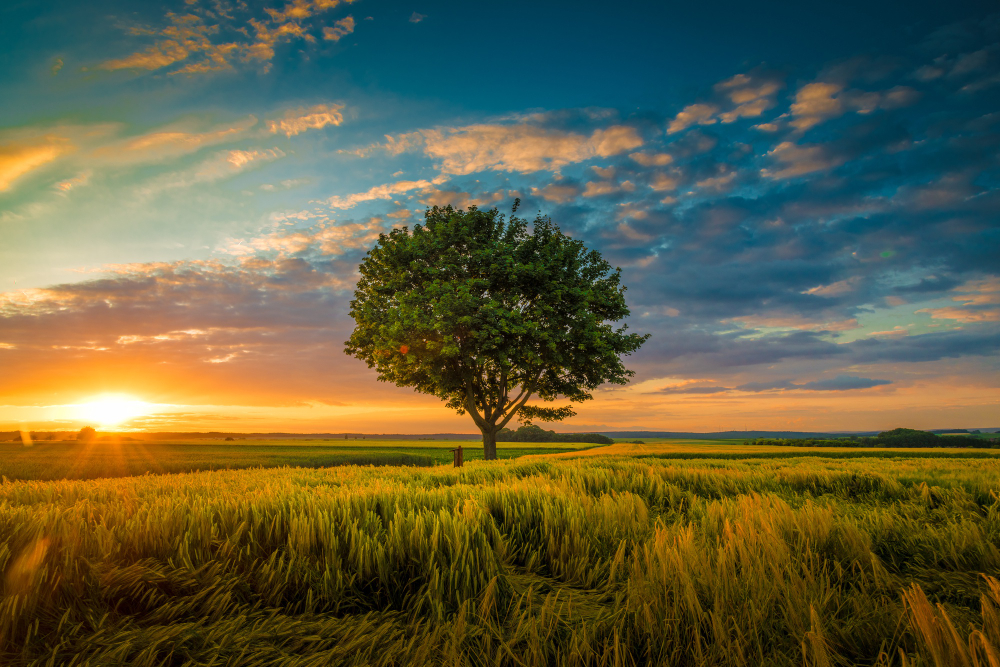

# **`بخش اول گرفتن عکس و اعمال نویز نمک فلفل به عکس`**



In [1]:
import cv2
import numpy as np

def salt_and_pepper_noise(image, prob):
    """
    این تابع با احتمال `prob` برای هر پیکسل در تصویر، آن پیکسل را سفید یا سیاه می‌کند.
    """
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

# خواندن تصویر
image = cv2.imread("/content/wide-angle-shot-single-tree-growing-clouded-sky-during-sunset-surrounded-by-grass.jpg")

# اعمال نویز نمک و فلفل
noisy_image = salt_and_pepper_noise(image, 0.036)

cv2.waitKey(0)
cv2.destroyAllWindows()

# ذخیره تصویر با نویز به صورت باینری
cv2.imwrite("/content/new.jpg", noisy_image)

True

# **`بخش دوم تقسیم کردن عکس به سه لایه سبز ، قرمز و آبی`**

In [ ]:
import cv2
import numpy as np

# خواندن تصویر رنگی
img = cv2.imread('/content/new.jpg')

# جداسازی لایه‌های R، G و B
b, g, r = cv2.split(img)
# تبدیل هر لایه به یک آرایه یک بعدی
b_arr = np.ravel(b)
g_arr = np.ravel(g)
r_arr = np.ravel(r)

# تبدیل هر آرایه به فایل باینری
with open('/content/blue.txt', 'wb') as f:
    f.write(np.unpackbits(b_arr))

with open('/content/green.txt', 'wb') as f:
    f.write(np.unpackbits(g_arr))

with open('/content/red.txt', 'wb') as f:
    f.write(np.unpackbits(r_arr))

# **`ادغام سه لایه جدا شده برای مطمئن شدن از درست بودن فایل های باینری`**

In [ ]:
import cv2
import numpy as np

# باز کردن فایل‌های باینری
with open('/content/blue.txt', 'rb') as f:
    b_data = np.packbits(np.frombuffer(f.read(), dtype=np.uint8))
print(b_data)
with open('/content/green.txt', 'rb') as f:
    g_data = np.packbits(np.frombuffer(f.read(), dtype=np.uint8))
print(g_data)
with open('/content/red.txt', 'rb') as f:
    r_data = np.packbits(np.frombuffer(f.read(), dtype=np.uint8))
print(r_data)
# تبدیل آرایه اعداد صحیح به ابعاد اصلی تصویر
height, width, _ = cv2.imread('/content/Screenshot42.png').shape
b_arr = np.reshape(b_data, (height, width))
g_arr = np.reshape(g_data, (height, width))
r_arr = np.reshape(r_data, (height, width))


# ترکیب لایه‌های B، G و R به یکدیگر
img = cv2.merge((b_arr, g_arr, r_arr))
# ذخیره تصویر بازسازی شده
cv2.imwrite('/content/reconstructed_image.png', img)

# **`تبدیل فایل بیت مپ به عکس`**

In [ ]:
from PIL import Image

# باز کردن فایل BMP
image = Image.open('filename.bmp')

# تبدیل تصویر به فرمت JPG و ذخیره در فایل جدید
image.save('new_image.jpg')

# **`تبدیل عکس نویز دار به فرمت`**
# **`.COE`**

# **`در این جا باید فایل عکس درست شده قسمت قبل را باز کرده و خروجی بصورت `**
# **`b-g-r`**

# **`در نهایت فایل با فرمت`**
# **`.coe`**
# **`تحویل میگرید`**

In [2]:
from PIL import Image

# باز کردن تصویر
img = Image.open("/content/new.jpg")

height, width, _ = cv2.imread('/content/new.jpg').shape

# تبدیل تصویر به فرمت COE
with open("output.coe", "w") as f:
    f.write("memory_initialization_radix=16;\n")
    f.write("memory_initialization_vector=\n")
    for y in range(img.height):
        for x in range(img.width):
            r, g, b = img.getpixel((x, y))
            hex_value = "{:02X}{:02X}{:02X}".format(b, g, r)
            f.write(hex_value + ",\n")

print(f"height = {height}, width = {width}")

height = 667, width = 1000


## **`در این جا فایل مرحله قبل باز میشود و از سطر آخر به اول در نوشته می شود.`**
## **`دو خط اول هدر که مبنا و بردار را نشان میدهد ثابت می مانند`**

In [3]:
with open('output.coe', 'r') as f1, open('output_file.coe', 'w') as f2:
    lines = f1.readlines()
    f2.write(lines[0])
    f2.write(lines[1])
    lines = lines[2:]
    lines.reverse()
    for line in lines:
        f2.write(line)